### `KNN ALGORITHM FROM SCRATCH`

***Import the required Libraries***

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

***Loading the Data***

In [35]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\diamonds (1).csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [36]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

***EDA on the given dataset***

***Univariate plot:***

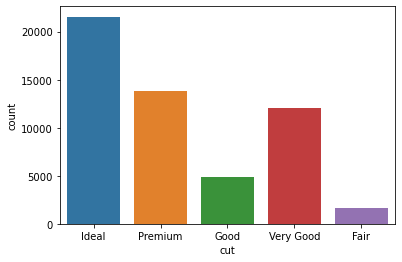

In [17]:
#Visualising the Count of Target Variable
sns.countplot(x='cut',data=df)
plt.show()

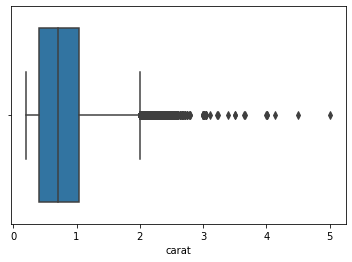

In [19]:
sns.boxplot(x='carat',data=df)
plt.show()

***Bivariate plot:***

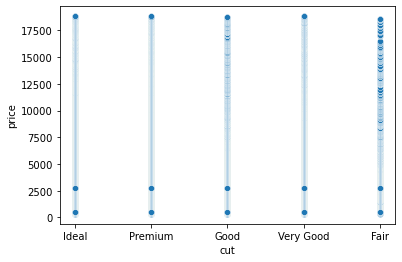

In [10]:
sns.scatterplot(y='price',x='cut',data=df)
plt.show()

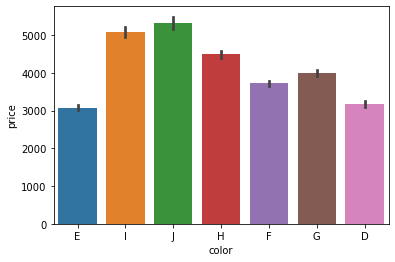

In [29]:
sns.barplot(x='color',y='price',data=df)
plt.show()

***Multivariate plot:***

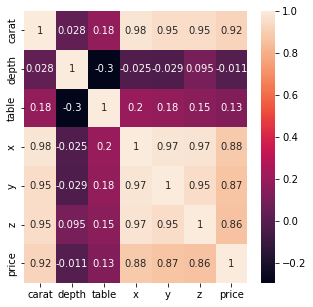

In [30]:
plt.figure(figsize=(5,5)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


`Machine Learning Problem`

***Type:Supervised***

***Task:Regression***

***Target Variable:price***

In [37]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [38]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [39]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33169,0.30,Ideal,D,VS1,61.9,54.1,4.28,4.33,2.67
53170,0.71,Premium,E,SI1,59.5,62.0,5.85,5.74,3.45
27846,0.30,Ideal,D,VS1,62.2,56.0,4.27,4.31,2.67
20880,1.02,Premium,F,VVS2,62.9,59.0,6.42,6.37,4.02
28554,0.30,Premium,H,VS1,60.1,61.0,4.32,4.30,2.59


In [40]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


 ***Separating Categorical and Numerical Columns:*** 

In [41]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33169,0.30,Ideal,D,VS1,61.9,54.1,4.28,4.33,2.67
53170,0.71,Premium,E,SI1,59.5,62.0,5.85,5.74,3.45
27846,0.30,Ideal,D,VS1,62.2,56.0,4.27,4.31,2.67
20880,1.02,Premium,F,VVS2,62.9,59.0,6.42,6.37,4.02
28554,0.30,Premium,H,VS1,60.1,61.0,4.32,4.30,2.59


In [42]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [43]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [44]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
33169,0.30,61.9,54.1,4.28,4.33,2.67
53170,0.71,59.5,62.0,5.85,5.74,3.45
27846,0.30,62.2,56.0,4.27,4.31,2.67
20880,1.02,62.9,59.0,6.42,6.37,4.02
28554,0.30,60.1,61.0,4.32,4.30,2.59


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
33169,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
53170,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311
27846,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
20880,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955
28554,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


In [46]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798408,61.756651,57.449729,5.732037,5.735852,3.539272
std,0.474547,1.435318,2.239620,1.122515,1.151986,0.695753
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


***Applying Label Encoding on Categorical Columns***

In [47]:
X_train_cat.head()

,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [48]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
33169
53170
27846
20880
28554


In [49]:
X_train_cat.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [50]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])
X_train_cat_le.head()

,cut
33169,4
53170,5
27846,4
20880,5
28554,5


In [51]:
X_train_cat.color.unique()

array(['D', 'E', 'F', 'H', 'G', 'I', 'J'], dtype=object)

In [52]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])
X_train_cat_le.head()

,cut,color
33169,4,7
53170,5,6
27846,4,7
20880,5,5
28554,5,3


In [53]:
X_train_cat.clarity.unique()

array(['VS1', 'SI1', 'VVS2', 'SI2', 'IF', 'VS2', 'I1', 'VVS1'],
      dtype=object)

In [54]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])
X_train_cat_le.head()

,cut,color,clarity
33169,4,7,5
53170,5,6,3
27846,4,7,5
20880,5,5,6
28554,5,3,5


***Concatinating the Encoded Categorical Features and Rescaled Numerical Features:***

In [55]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
33169,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413,4,7,5
53170,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311,5,6,3
27846,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413,4,7,5
20880,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955,5,5,6
28554,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397,5,3,5


***Preparing Test Data***

In [56]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 52264 to 52186
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [58]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [59]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [60]:
#Rescaling Numerical columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)
X_test_num_rescaled.head()

,carat,depth,table,x,y,z
52264,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
21073,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552
42161,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639
35974,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
7641,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016


In [61]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)
X_test_cat_le.head()

""
52264
21073
42161
35974
7641


In [62]:
#Encoding categorical columns
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])
X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


***Concatinating the Encoded Categorical Features and Rescaled Numerical Features on test transformation:***

In [63]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654,4,6,4
21073,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552,4,4,5
42161,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639,4,4,3
35974,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339,4,5,5
7641,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016,5,4,8


***KNN algorithm implementation***

In [72]:
%%time
array=[]
k=3
for i in range(0,X_test_transformed.shape[0]):
    distance_vectors=np.power(np.sum((np.power((X_train_transformed.values - X_test_transformed.values[i]),2)),axis=1),1/2)
    Ind_ex=X_train_transformed.to_records().index
    KNN=pd.DataFrame({"Distance":distance_vectors},index=Ind_ex)
    I=KNN.sort_values(by=["Distance"])[:k]
    sum=0
    for i in I.index:
        sum+=y_train[i]
    print(sum/k)
    array.append(sum/k)

Ind_ex_test=X_test_transformed.to_records().index
predict_test=pd.Series(data=array,index=Ind_ex_test)


1818.0
8674.333333333334
1307.0
1005.6666666666666
3473.6666666666665
5469.333333333333
773.6666666666666
1894.0
4702.0
613.3333333333334
6031.0
2459.3333333333335
772.0
1683.0
2492.3333333333335
8966.333333333334
1023.3333333333334
2713.3333333333335
767.3333333333334
703.3333333333334
1691.0
775.0
1218.0
6363.0
14279.0
7261.0
3032.0
4949.333333333333
7699.0
457.6666666666667
8353.0
3782.3333333333335
10083.0
739.3333333333334
5074.666666666667
684.0
6927.666666666667
5810.333333333333
445.0
942.3333333333334
1784.3333333333333
1890.6666666666667
831.3333333333334
6464.666666666667
754.3333333333334
806.0
2520.3333333333335
8700.0
1822.0
943.0
769.3333333333334
856.6666666666666
3185.6666666666665
5365.333333333333
1324.6666666666667
8756.333333333334
5642.666666666667
14305.0
925.3333333333334
2128.3333333333335
1344.6666666666667
7941.666666666667
1013.6666666666666
4627.333333333333
7038.333333333333
1590.6666666666667
685.0
5061.666666666667
2567.3333333333335
4200.0
1023.66666666

6534.666666666667
9029.333333333334
611.0
440.6666666666667
3746.6666666666665
750.3333333333334
975.0
2519.3333333333335
2475.6666666666665
869.0
564.0
3372.0
1536.3333333333333
677.6666666666666
543.3333333333334
697.3333333333334
990.3333333333334
6695.0
15754.333333333334
2267.6666666666665
1864.0
7598.666666666667
884.3333333333334
17054.666666666668
12310.666666666666
507.6666666666667
733.3333333333334
16180.666666666666
1160.0
3722.3333333333335
4289.0
910.0
882.6666666666666
1000.6666666666666
1113.0
2578.0
1114.3333333333333
5215.0
2555.6666666666665
3907.6666666666665
1199.3333333333333
1118.0
1003.0
4808.333333333333
9832.0
7512.333333333333
2821.3333333333335
2149.0
1507.0
673.0
4102.333333333333
4071.3333333333335
1094.3333333333333
13206.333333333334
3838.3333333333335
5004.333333333333
882.0
10577.0
1757.0
10955.666666666666
10372.666666666666
3605.0
554.0
8453.666666666666
1510.3333333333333
6245.333333333333
4389.666666666667
3090.3333333333335
6056.0
1206.66666666666

5215.0
1377.0
892.0
413.3333333333333
631.0
1114.3333333333333
3838.0
7274.333333333333
1062.0
1751.0
11907.333333333334
3622.6666666666665
7469.333333333333
5495.333333333333
625.3333333333334
2840.0
4212.0
4436.0
14282.333333333334
11276.0
9136.666666666666
1485.6666666666667
1142.6666666666667
2896.3333333333335
11598.666666666666
1047.3333333333333
3095.3333333333335
726.6666666666666
3880.6666666666665
2750.0
1629.6666666666667
609.3333333333334
5193.333333333333
1433.0
1104.6666666666667
729.0
721.3333333333334
2177.0
4164.666666666667
664.6666666666666
7540.333333333333
721.6666666666666
3472.0
8812.333333333334
3023.0
7094.333333333333
1737.6666666666667
11829.666666666666
665.6666666666666
9386.333333333334
734.0
661.0
750.3333333333334
14919.333333333334
559.0
16923.333333333332
524.0
3604.3333333333335
991.0
913.3333333333334
12469.0
1095.0
727.0
854.6666666666666
547.6666666666666
7670.333333333333
731.0
1965.0
6045.333333333333
934.0
2793.3333333333335
818.3333333333334
68

11738.0
3842.0
1937.3333333333333
1027.6666666666667
668.6666666666666
1496.0
3700.6666666666665
992.0
5384.333333333333
850.6666666666666
1767.0
4295.666666666667
431.6666666666667
792.3333333333334
552.6666666666666
3544.0
2534.6666666666665
3369.6666666666665
731.3333333333334
1663.3333333333333
3286.6666666666665
782.6666666666666
928.3333333333334
2311.6666666666665
738.0
3197.0
1687.3333333333333
5958.666666666667
991.6666666666666
818.6666666666666
3090.0
738.0
524.6666666666666
1477.0
1523.6666666666667
599.0
881.0
2029.0
1013.0
3544.0
811.0
1287.3333333333333
611.0
517.0
1690.6666666666667
5762.666666666667
11440.666666666666
5801.0
722.0
5006.333333333333
2495.6666666666665
9113.333333333334
2659.6666666666665
434.3333333333333
944.3333333333334
12553.333333333334
9280.0
10917.0
2072.6666666666665
16532.0
778.3333333333334
1124.0
5916.333333333333
16018.333333333334
3348.6666666666665
3916.6666666666665
833.0
806.3333333333334
2724.0
3763.0
1477.6666666666667
707.0
9855.0
905

1664.6666666666667
16310.666666666666
1683.0
1344.0
944.6666666666666
689.6666666666666
4526.0
11202.333333333334
2057.6666666666665
2262.0
2864.0
1872.6666666666667
11888.0
1705.3333333333333
6475.666666666667
6087.666666666667
617.0
1067.6666666666667
9518.666666666666
706.0
5186.333333333333
3728.0
860.0
702.6666666666666
8812.333333333334
4727.0
722.6666666666666
2442.3333333333335
1008.6666666666666
632.6666666666666
767.3333333333334
5326.333333333333
5073.333333333333
1060.6666666666667
6729.0
4387.666666666667
667.3333333333334
1217.0
1062.0
711.0
4269.0
13393.0
802.6666666666666
1530.6666666666667
3709.6666666666665
1277.3333333333333
5292.333333333333
1799.3333333333333
17831.0
1888.3333333333333
2281.6666666666665
2243.0
412.6666666666667
11115.666666666666
723.3333333333334
3675.0
1678.0
2555.0
1659.6666666666667
983.3333333333334
2642.6666666666665
10753.333333333334
905.3333333333334
1647.0
4447.666666666667
679.6666666666666
12416.666666666666
2809.3333333333335
4507.333

6215.666666666667
13712.333333333334
6981.333333333333
819.3333333333334
10513.333333333334
595.3333333333334
3601.0
12181.333333333334
5353.666666666667
4053.6666666666665
10232.0
2685.0
11928.0
2812.6666666666665
677.3333333333334
4751.666666666667
7435.0
4065.0
1944.6666666666667
7755.0
3399.3333333333335
5208.333333333333
2108.0
675.3333333333334
1741.0
3271.3333333333335
3544.3333333333335
3918.0
4548.0
618.0
9157.0
8287.333333333334
2328.0
4071.3333333333335
595.3333333333334
420.3333333333333
3375.0
881.0
581.6666666666666
761.3333333333334
5827.333333333333
3465.0
6023.666666666667
3696.0
2324.3333333333335
1193.3333333333333
3926.0
6512.666666666667
5589.666666666667
847.3333333333334
1224.0
3351.0
14210.333333333334
574.6666666666666
2585.0
664.6666666666666
4472.666666666667
936.6666666666666
534.0
7119.666666666667
444.3333333333333
5824.0
4558.333333333333
3734.0
5439.0
896.0
802.6666666666666
2053.3333333333335
15659.666666666666
822.6666666666666
982.0
4558.666666666667


17367.666666666668
2029.0
1848.3333333333333
3772.3333333333335
1507.3333333333333
1069.3333333333333
1310.3333333333333
11593.666666666666
8876.333333333334
682.6666666666666
1069.0
1783.0
622.0
3763.3333333333335
2603.6666666666665
1934.0
9683.0
841.6666666666666
793.0
3072.0
2567.0
1697.3333333333333
3053.6666666666665
5439.0
2804.6666666666665
939.0
1316.3333333333333
5322.0
543.0
9106.0
13294.0
11424.0
3148.3333333333335
600.3333333333334
2204.3333333333335
6801.666666666667
16171.0
3828.3333333333335
5067.0
6941.666666666667
1158.6666666666667
6062.666666666667
1043.0
5221.333333333333
11202.333333333334
17808.333333333332
3508.6666666666665
1412.6666666666667
4968.0
821.0
11065.333333333334
558.3333333333334
4307.666666666667
724.6666666666666
724.3333333333334
4521.333333333333
2541.3333333333335
862.3333333333334
4313.666666666667
1896.0
765.0
715.6666666666666
5296.333333333333
3402.3333333333335
823.6666666666666
595.3333333333334
4716.333333333333
4019.0
9393.333333333334
8

1763.3333333333333
6201.333333333333
1060.6666666666667
9453.666666666666
12762.666666666666
6028.666666666667
2092.0
727.6666666666666
8474.666666666666
3365.6666666666665
1494.0
1600.0
9164.333333333334
5445.666666666667
782.0
1627.3333333333333
2997.3333333333335
1787.6666666666667
2295.6666666666665
488.0
1938.3333333333333
1708.6666666666667
1061.0
6339.0
2658.0
7495.666666666667
14347.666666666666
1225.0
1284.0
3606.0
7876.666666666667
3613.6666666666665
5772.666666666667
1937.3333333333333
542.3333333333334
4120.0
4338.0
776.3333333333334
11453.333333333334
641.3333333333334
1860.3333333333333
3546.6666666666665
8736.0
1351.0
2692.0
4345.333333333333
4046.3333333333335
1280.6666666666667
1846.3333333333333
3073.3333333333335
6212.666666666667
2444.0
4896.666666666667
14922.333333333334
918.0
1906.0
2316.6666666666665
468.6666666666667
4421.666666666667
1204.3333333333333
6041.666666666667
560.6666666666666
1086.0
10971.333333333334
856.3333333333334
1732.6666666666667
676.666666

10837.333333333334
11419.0
1338.0
557.0
2193.6666666666665
9663.666666666666
3394.0
2591.3333333333335
14711.333333333334
4162.333333333333
14204.333333333334
1597.3333333333333
5245.666666666667
5824.0
541.3333333333334
16239.666666666666
659.6666666666666
751.0
6217.666666666667
526.6666666666666
768.0
910.6666666666666
11792.666666666666
562.0
910.0
820.0
2453.3333333333335
7819.0
824.6666666666666
3189.6666666666665
1614.0
5434.666666666667
11173.333333333334
497.3333333333333
719.6666666666666
4387.666666666667
10661.333333333334
9597.333333333334
3012.3333333333335
5106.333333333333
15360.666666666666
903.3333333333334
2690.3333333333335
3272.3333333333335
1769.6666666666667
7399.666666666667
13153.666666666666
4210.333333333333
1692.3333333333333
2093.3333333333335
1385.3333333333333
2857.6666666666665
1010.0
1809.3333333333333
917.6666666666666
2857.0
4281.333333333333
4221.0
613.0
751.3333333333334
4931.666666666667
524.6666666666666
897.3333333333334
2413.6666666666665
1000.0

1899.0
490.6666666666667
774.6666666666666
750.3333333333334
6808.0
650.3333333333334
741.0
2556.6666666666665
7466.333333333333
1011.3333333333334
1841.3333333333333
5774.333333333333
11440.0
5438.333333333333
1524.0
7566.333333333333
567.6666666666666
4671.0
5740.0
686.3333333333334
896.3333333333334
716.3333333333334
3872.0
5163.666666666667
2422.0
896.0
4952.333333333333
2678.6666666666665
4760.0
2299.3333333333335
2232.6666666666665
4256.333333333333
497.0
5476.333333333333
13381.0
917.6666666666666
5830.666666666667
486.0
4664.333333333333
618.0
997.6666666666666
684.0
893.3333333333334
4800.666666666667
6111.666666666667
1158.0
1728.3333333333333
1112.3333333333333
1022.3333333333334
3452.3333333333335
1953.3333333333333
1139.3333333333333
9116.0
1770.6666666666667
821.6666666666666
452.0
806.0
7908.666666666667
2823.6666666666665
2608.3333333333335
1305.0
7820.333333333333
14938.333333333334
834.6666666666666
2513.6666666666665
542.0
6682.0
3327.0
749.6666666666666
767.0
4733.6

1918.0
4585.0
544.0
1404.3333333333333
823.6666666666666
5769.666666666667
3336.6666666666665
3632.6666666666665
848.3333333333334
798.0
3073.6666666666665
2632.0
638.6666666666666
526.6666666666666
6304.0
3027.3333333333335
2391.0
478.0
4080.0
4662.0
15773.333333333334
666.0
917.3333333333334
2402.3333333333335
4971.333333333333
4271.0
1577.0
515.3333333333334
1057.6666666666667
7439.333333333333
3620.6666666666665
2393.3333333333335
4050.0
2759.3333333333335
2141.3333333333335
5096.0
1489.3333333333333
5703.0
2109.0
17200.333333333332
1098.3333333333333
457.0
1391.6666666666667
4363.333333333333
2624.3333333333335
5224.333333333333
878.0
517.3333333333334
3266.3333333333335
4510.666666666667
1878.3333333333333
869.3333333333334
12277.0
1637.6666666666667
1257.3333333333333
6584.333333333333
562.0
2179.3333333333335
16300.666666666666
452.0
2156.6666666666665
8760.333333333334
858.0
11434.0
1138.0
720.0
6780.666666666667
3327.6666666666665
701.6666666666666
3094.3333333333335
2097.0
1

3644.3333333333335
915.0
3244.0
2796.3333333333335
5456.333333333333
5162.0
2402.0
728.6666666666666
4815.666666666667
7680.333333333333
790.3333333333334
12287.666666666666
1609.3333333333333
4822.666666666667
7488.0
1917.3333333333333
2301.3333333333335
2455.6666666666665
2629.0
1199.0
12682.666666666666
2544.3333333333335
4056.6666666666665
4747.0
668.6666666666666
17038.0
1773.0
1228.6666666666667
823.6666666666666
8995.333333333334
5056.0
7730.0
997.3333333333334
13411.333333333334
5014.0
1806.6666666666667
4402.333333333333
1046.0
884.6666666666666
815.6666666666666
1336.6666666666667
10271.333333333334
2858.3333333333335
1792.0
1936.6666666666667
789.3333333333334
599.6666666666666
681.6666666666666
583.3333333333334
11501.0
2385.3333333333335
3593.0
551.3333333333334
1109.6666666666667
11008.666666666666
739.6666666666666
812.6666666666666
6329.333333333333
10221.0
1259.3333333333333
2932.3333333333335
2467.0
1159.0
7284.0
3379.3333333333335
545.6666666666666
8584.333333333334


3134.6666666666665
10037.0
5050.333333333333
974.3333333333334
533.3333333333334
5971.666666666667
13550.333333333334
821.0
2298.3333333333335
5487.666666666667
823.6666666666666
3753.0
5849.666666666667
1412.0
833.3333333333334
772.6666666666666
921.0
646.6666666666666
769.3333333333334
4346.333333333333
658.0
809.0
1344.0
392.0
570.0
9028.666666666666
909.3333333333334
2592.3333333333335
858.0
687.0
3636.6666666666665
1003.3333333333334
1822.0
881.3333333333334
2121.0
764.0
3264.6666666666665
433.6666666666667
5378.333333333333
7950.333333333333
643.0
15021.666666666666
1966.0
1130.3333333333333
884.6666666666666
1322.3333333333333
1408.3333333333333
1842.6666666666667
2447.0
4986.666666666667
4650.0
5734.333333333333
3019.0
6566.333333333333
548.6666666666666
6577.333333333333
484.0
11907.333333333334
2982.3333333333335
782.0
10517.666666666666
4494.0
8006.0
460.0
5704.0
3666.0
1314.0
1816.0
4630.333333333333
8184.333333333333
808.6666666666666
693.6666666666666
6560.666666666667
13

7056.0
6514.333333333333
751.0
884.3333333333334
4646.0
5065.333333333333
823.0
6530.0
2169.3333333333335
4238.666666666667
13568.0
1752.0
13755.666666666666
5842.333333333333
811.0
1808.6666666666667
14844.333333333334
7989.666666666667
4064.6666666666665
3835.6666666666665
15409.666666666666
7337.666666666667
777.3333333333334
3915.6666666666665
659.0
5096.0
3148.0
11491.666666666666
1091.3333333333333
697.6666666666666
479.3333333333333
14242.333333333334
4401.666666666667
5652.0
1275.3333333333333
4484.0
2116.3333333333335
1491.3333333333333
8180.333333333333
6324.666666666667
1549.3333333333333
2723.0
1506.3333333333333
5137.0
3844.3333333333335
2443.3333333333335
764.0
686.0
808.0
651.0
2864.6666666666665
3687.6666666666665
566.3333333333334
5439.333333333333
958.6666666666666
720.0
4397.666666666667
7124.333333333333
15159.333333333334
1665.3333333333333
616.0
2768.3333333333335
552.3333333333334
4460.666666666667
4527.666666666667
8923.0
1710.6666666666667
5726.333333333333
604

1070.0
741.3333333333334
1646.6666666666667
1256.6666666666667
3295.3333333333335
651.6666666666666
718.0
577.0
1281.3333333333333
12675.0
7223.666666666667
1063.3333333333333
797.6666666666666
6668.0
2350.6666666666665
5600.333333333333
8554.666666666666
1785.3333333333333
2067.0
534.0
936.6666666666666
2135.3333333333335
1888.3333333333333
11744.333333333334
544.6666666666666
4350.333333333333
468.6666666666667
653.0
6225.0
5216.0
5933.666666666667
2793.0
3120.6666666666665
4802.0
3142.6666666666665
1050.3333333333333
7784.666666666667
9025.333333333334
859.3333333333334
1673.3333333333333
3808.3333333333335
873.6666666666666
4819.666666666667
13519.666666666666
8037.333333333333
3563.3333333333335
842.3333333333334
1787.0
5121.666666666667
456.0
1313.0
5153.333333333333
5694.0
5677.333333333333
2582.6666666666665
3891.6666666666665
499.0
1041.0
2422.3333333333335
729.6666666666666
554.6666666666666
3183.6666666666665
8082.333333333333
9833.0
7644.666666666667
7558.666666666667
4435.

5762.0
2518.0
15714.0
1712.0
6869.666666666667
6617.333333333333
4448.333333333333
2058.6666666666665
664.3333333333334
3362.0
2187.0
6908.666666666667
3622.3333333333335
1655.6666666666667
662.6666666666666
1129.0
904.3333333333334
1752.3333333333333
502.3333333333333
920.6666666666666
1006.3333333333334
7541.0
7076.333333333333
3386.3333333333335
1217.0
627.6666666666666
4058.3333333333335
3244.0
457.6666666666667
15429.0
774.6666666666666
3775.6666666666665
974.0
2455.3333333333335
5019.666666666667
1790.0
6318.0
1013.0
3435.3333333333335
5014.333333333333
4673.0
2155.3333333333335
626.3333333333334
1734.3333333333333
3099.0
2944.6666666666665
1015.3333333333334
1375.0
2843.3333333333335
1093.6666666666667
581.0
1875.6666666666667
806.6666666666666
4438.666666666667
4473.666666666667
1264.0
3098.3333333333335
4677.0
6215.333333333333
3142.6666666666665
874.6666666666666
688.0
3174.0
1389.6666666666667
2821.6666666666665
5503.333333333333
1874.3333333333333
4686.0
4789.0
1740.6666666

798.6666666666666
4393.666666666667
1256.3333333333333
1368.0
1653.6666666666667
1043.0
7598.666666666667
867.3333333333334
1818.6666666666667
3621.3333333333335
3893.0
2222.6666666666665
15229.0
670.0
5643.333333333333
883.3333333333334
1629.0
12480.666666666666
2108.6666666666665
1038.0
11486.666666666666
1745.3333333333333
2288.0
1646.0
3712.3333333333335
4000.3333333333335
5035.0
4417.333333333333
1561.6666666666667
3229.3333333333335
1360.6666666666667
4545.333333333333
1686.0
7148.0
687.6666666666666
583.3333333333334
2155.3333333333335
5425.666666666667
2598.3333333333335
735.3333333333334
536.6666666666666
1211.3333333333333
722.6666666666666
5290.333333333333
865.0
961.6666666666666
662.0
3143.3333333333335
6890.333333333333
12069.0
747.3333333333334
3667.6666666666665
995.0
15624.0
8630.333333333334
664.3333333333334
1440.0
1034.3333333333333
8792.0
14939.666666666666
4248.666666666667
543.6666666666666
2878.3333333333335
791.3333333333334
1173.0
4377.333333333333
743.0
1601.

1415.3333333333333
2915.0
903.6666666666666
882.0
7298.0
5500.666666666667
975.6666666666666
4968.0
3843.6666666666665
2912.6666666666665
910.0
713.0
3217.6666666666665
6772.666666666667
4570.0
940.6666666666666
5716.0
10753.333333333334
6516.666666666667
3798.0
3004.0
1024.0
2369.0
1655.3333333333333
1094.3333333333333
10639.333333333334
666.3333333333334
5100.0
6140.666666666667
2775.0
1595.0
1022.6666666666666
4453.0
1275.6666666666667
13964.0
13575.666666666666
880.0
841.6666666666666
5361.333333333333
3835.6666666666665
3984.3333333333335
4521.333333333333
13171.0
4571.333333333333
1139.3333333333333
6251.333333333333
4963.0
6698.666666666667
3829.3333333333335
4814.666666666667
546.0
949.3333333333334
5092.0
1875.6666666666667
1833.6666666666667
5440.666666666667
695.6666666666666
5986.666666666667
6620.333333333333
687.3333333333334
15032.0
1709.3333333333333
10087.0
950.3333333333334
515.3333333333334
4857.0
1094.6666666666667
1721.0
2007.0
1425.6666666666667
9955.0
869.0
2946.

8846.333333333334
684.6666666666666
1621.0
12633.0
1251.0
1505.6666666666667
2993.6666666666665
11708.0
1184.6666666666667
857.6666666666666
6671.333333333333
2725.3333333333335
1873.0
3589.0
16391.0
1760.6666666666667
600.6666666666666
2836.0
4175.0
2203.3333333333335
5904.333333333333
3860.6666666666665
5104.0
5587.0
6339.333333333333
3003.6666666666665
830.3333333333334
1129.0
623.0
1463.0
8316.333333333334
5809.666666666667
5848.333333333333
12252.0
4238.333333333333
872.6666666666666
4712.0
1651.3333333333333
9496.0
1754.6666666666667
3276.6666666666665
535.3333333333334
3979.3333333333335
824.0
4598.333333333333
3589.0
1745.6666666666667
1700.0
5678.666666666667
988.3333333333334
9663.666666666666
4694.0
16574.0
1509.3333333333333
723.3333333333334
961.6666666666666
985.0
5001.333333333333
3925.3333333333335
1318.6666666666667
1502.0
12410.0
1863.3333333333333
600.6666666666666
673.3333333333334
624.0
8719.333333333334
2612.3333333333335
2690.0
836.0
4649.333333333333
648.0
744.0

2879.0
4437.0
15640.0
4259.333333333333
1755.0
515.0
7482.0
2679.0
826.6666666666666
4931.666666666667
1629.0
14897.666666666666
6293.666666666667
3888.0
11455.333333333334
4551.0
665.0
2114.0
3466.3333333333335
4640.666666666667
10736.333333333334
1685.0
853.3333333333334
1057.6666666666667
811.6666666666666
978.6666666666666
4922.0
5523.666666666667
16373.666666666666
7694.666666666667
7671.666666666667
743.0
13438.333333333334
658.0
9553.0
2007.3333333333333
754.3333333333334
2748.6666666666665
15552.666666666666
8316.333333333334
9710.0
719.0
8495.0
789.3333333333334
2362.3333333333335
10284.666666666666
5877.333333333333
13299.333333333334
2104.0
969.3333333333334
3154.6666666666665
4871.333333333333
927.3333333333334
1852.6666666666667
1307.0
4491.666666666667
4802.666666666667
4766.0
1354.0
3425.6666666666665
950.3333333333334
2891.3333333333335
2127.3333333333335
7598.666666666667
11727.333333333334
3075.3333333333335
1015.0
3942.6666666666665
8122.666666666667
7960.66666666666

7092.0
773.0
2758.3333333333335
749.6666666666666
833.0
6799.333333333333
10464.666666666666
3823.3333333333335
6341.333333333333
449.0
6419.0
844.0
1932.3333333333333
4910.333333333333
927.3333333333334
711.6666666666666
3245.6666666666665
15524.666666666666
1328.3333333333333
6963.666666666667
1742.6666666666667
667.3333333333334
4460.0
716.0
756.0
4064.0
763.6666666666666
752.3333333333334
6933.666666666667
1863.0
767.3333333333334
1673.6666666666667
2682.6666666666665
9230.333333333334
2087.0
2001.3333333333333
4216.666666666667
964.6666666666666
11177.333333333334
3456.6666666666665
649.6666666666666
5013.666666666667
1242.0
3139.3333333333335
1093.3333333333333
5243.0
4407.666666666667
9506.0
420.0
5345.333333333333
1878.3333333333333
8361.333333333334
1726.3333333333333
3404.0
604.3333333333334
1982.3333333333333
2673.3333333333335
2431.0
5136.0
1716.6666666666667
5018.666666666667
1033.3333333333333
3276.0
5316.333333333333
3822.3333333333335
5242.0
8288.333333333334
7302.66666

4836.0
6165.666666666667
552.3333333333334
621.6666666666666
11738.0
1001.3333333333334
664.3333333333334
10556.333333333334
2846.0
6269.333333333333
907.0
5425.0
4460.333333333333
2083.0
3439.6666666666665
3906.3333333333335
2814.3333333333335
5361.0
4580.0
648.0
1806.0
4346.333333333333
1031.3333333333333
2623.0
2710.3333333333335
10421.666666666666
2885.0
3826.3333333333335
5181.666666666667
667.0
846.0
2245.6666666666665
4146.0
4486.666666666667
2382.3333333333335
2433.3333333333335
2055.6666666666665
831.3333333333334
1016.6666666666666
3620.0
5137.666666666667
970.6666666666666
905.0
575.0
12034.0
7325.666666666667
7163.0
4202.0
3494.6666666666665
661.6666666666666
636.6666666666666
6514.333333333333
4886.666666666667
767.6666666666666
3223.3333333333335
1277.0
2658.0
634.3333333333334
3022.3333333333335
1601.6666666666667
4320.666666666667
4639.333333333333
6031.0
5154.333333333333
1721.6666666666667
1974.6666666666667
5624.0
6399.0
4139.666666666667
5069.0
650.3333333333334
799

2095.3333333333335
3355.3333333333335
13916.666666666666
1336.3333333333333
4469.333333333333
801.0
4587.666666666667
961.3333333333334
14581.0
5634.333333333333
865.0
17976.333333333332
589.0
2328.3333333333335
2459.6666666666665
2233.3333333333335
7099.666666666667
16389.666666666668
394.6666666666667
871.3333333333334
1618.6666666666667
5820.333333333333
4567.0
10260.333333333334
1089.6666666666667
744.6666666666666
1260.3333333333333
645.6666666666666
4516.666666666667
6765.666666666667
4669.333333333333
4892.0
2519.6666666666665
780.0
1281.3333333333333
4688.0
9746.666666666666
17266.0
5600.333333333333
633.6666666666666
3827.0
5555.666666666667
1713.0
1036.0
662.0
631.6666666666666
597.3333333333334
2722.0
652.6666666666666
14403.0
1345.0
12082.666666666666
4404.333333333333
3437.6666666666665
5308.333333333333
15500.333333333334
4452.666666666667
2738.3333333333335
1663.3333333333333
604.3333333333334
2956.0
517.0
568.3333333333334
1918.0
10122.0
4800.0
4220.333333333333
781.0
1

5054.0
9352.0
4357.0
2382.6666666666665
13871.333333333334
12753.333333333334
6635.666666666667
4984.666666666667
4607.333333333333
4950.0
8891.666666666666
692.6666666666666
4628.333333333333
3336.6666666666665
2643.3333333333335
500.3333333333333
11420.0
12972.0
586.0
854.6666666666666
4764.333333333333
6316.0
998.3333333333334
890.0
2382.3333333333335
3026.6666666666665
1480.3333333333333
484.0
15743.0
666.6666666666666
1126.6666666666667
7302.666666666667
2384.0
3234.0
819.3333333333334
4524.666666666667
3295.0
825.6666666666666
1795.0
2885.0
845.0
3207.3333333333335
499.3333333333333
8670.0
810.3333333333334
476.3333333333333
2080.6666666666665
1397.3333333333333
13324.666666666666
541.0
6353.0
14058.666666666666
2694.6666666666665
13404.0
1135.3333333333333
3919.6666666666665
2373.0
697.3333333333334
1046.3333333333333
7477.666666666667
626.0
5250.333333333333
652.3333333333334
921.0
765.6666666666666
802.0
2237.6666666666665
4435.333333333333
2695.6666666666665
661.6666666666666

,Predict_Scratch_val
52264,1818.000000
21073,8674.333333
42161,1307.000000
35974,1005.666667
7641,3473.666667
...,...
47753,1864.000000
2876,3803.333333
2041,539.000000
33250,949.000000


***Predicted_Scratch values for KNN***

In [73]:
df= pd.DataFrame(predict_test)
df.columns = ["Predict_Scratch_val"]
df

,Predict_Scratch_val
52264,1818.000000
21073,8674.333333
42161,1307.000000
35974,1005.666667
7641,3473.666667
...,...
47753,1864.000000
2876,3803.333333
2041,539.000000
33250,949.000000


In [74]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predict_test))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predict_test))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predict_test)))

Mean Absolute Error:  395.36895315782965
Mean Squared Error:  586256.7700160672
Root Mean Squared Error:  765.6740625201217


***KNN Algorithm by sklearn***

In [75]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [76]:
y_test_pred = regressor.predict(X_test_transformed)

In [77]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df_pred.head()

,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1136.6
35974,921,960.4
7641,4268,5510.6


In [78]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  382.1343270300334
Mean Squared Error:  563397.9181401556
Root Mean Squared Error:  750.5983733929588


***Comparing Scratch implementation values with actual and predicted values***

In [79]:
comp_values=pd.concat([df,df_pred],axis=1)
comp_values.columns=['Predict_Scratch_val','Actual','Predicted']
comp_values

,Predict_Scratch_val,Actual,Predicted
52264,1818.000000,2491,1779.6
21073,8674.333333,9248,9000.6
42161,1307.000000,1284,1136.6
35974,1005.666667,921,960.4
7641,3473.666667,4268,5510.6
...,...,...,...
47753,1864.000000,1892,1914.4
2876,3803.333333,3276,3939.8
2041,539.000000,561,543.8
33250,949.000000,825,949.6
